In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data 
data=pd.read_csv("C:/Users/Ayushi Chaudhuri/Desktop/Malware 2.0/Malware-drebin - Copy/data/malgenome215dataset1260malware2539benign.csv",)

In [3]:
data.shape

(3799, 216)

In [4]:
ro,col = data.shape

In [5]:
X = data.iloc[:,range(0,col-1)] #Feature set
y = data.iloc[:,col-1] #Class labels S, B --> Binary Classification 


In [6]:
X

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,READ_EXTERNAL_STORAGE,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3795,1,1,1,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3796,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3797,1,1,1,1,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Univariate Feature Selection for Logistic Regression

In [18]:
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
yb = lb.fit_transform(y).ravel()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score, accuracy_score


#selection_percentage = [.25,.40,.55,.70,.85,1]
selection_percentage = [.40,.43,.46,.48,.51,.55]
results_all =[]

all_importance = []

for i in selection_percentage:
    sl = math.floor((col-1)*i)
    X_new = SelectKBest(chi2, k=sl).fit_transform(X, y)
    X_train,X_test, y_train, y_test =train_test_split(X_new,yb,test_size=0.20, random_state = 40)
    clf = LogisticRegression(random_state=100,solver='saga',max_iter=300).fit(X_train, y_train)
    
    # get importance
    importance = clf.coef_[0]
    
    all_importance.append(importance)
    
    y_pred_lr =clf.predict(X_test)
    
    mc_lr=matthews_corrcoef(y_test, y_pred_lr)
    f1_lr=f1_score(y_test, y_pred_lr)

    acc_lr= accuracy_score(y_test, y_pred_lr)
    print('--------------------------------')
    print('Percentage: {}'.format(i))
    print('Selected feature:{}'.format(sl))
    print('Accuracy:{}'.format(acc_lr))
    print('F1-score:{}'.format(f1_lr))
    print('MCC-score:{}'.format(mc_lr))
    print('--------------------------------')
    
    results_all.append([i, sl, acc_lr,f1_lr,mc_lr])

--------------------------------
Percentage: 0.4
Selected feature:86
Accuracy:0.9855263157894737
F1-score:0.9780439121756487
MCC-score:0.9672533665614411
--------------------------------
--------------------------------
Percentage: 0.43
Selected feature:92
Accuracy:0.9855263157894737
F1-score:0.978131212723658
MCC-score:0.9673194209594288
--------------------------------
--------------------------------
Percentage: 0.46
Selected feature:98
Accuracy:0.9842105263157894
F1-score:0.9760956175298805
MCC-score:0.9643077982764424
--------------------------------
--------------------------------
Percentage: 0.48
Selected feature:103
Accuracy:0.9868421052631579
F1-score:0.9799196787148595
MCC-score:0.9702051076094816
--------------------------------
--------------------------------
Percentage: 0.51
Selected feature:109
Accuracy:0.9868421052631579
F1-score:0.98
MCC-score:0.9702135483728812
--------------------------------
--------------------------------
Percentage: 0.55
Selected feature:118
Acc

In [21]:
results_all = pd.DataFrame(results_all)
results_all

,0,1,2,3,4
0,0.40,86,0.985526,0.978044,0.967253
1,0.43,92,0.985526,0.978131,0.967319
2,0.46,98,0.984211,0.976096,0.964308
3,0.48,103,0.986842,0.979920,0.970205
4,0.51,109,0.986842,0.980000,0.970214
5,0.55,118,0.988158,0.981964,0.973188


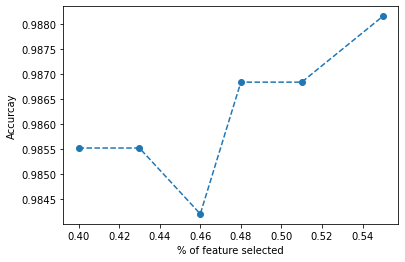

In [20]:
import matplotlib.pyplot as plt 
plt.plot(results_all.iloc[:,0],results_all.iloc[:,2], 'o--') #percentage selection vs accuracy
plt.xlabel('% of feature selected')
plt.ylabel('Accurcay')
plt.show()

Max accurcay is 98.82% for 55.00000000000001% of the whole features


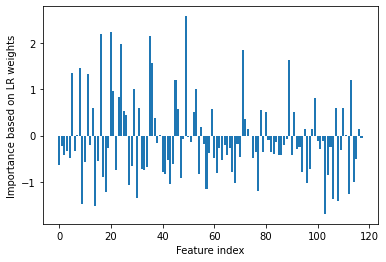

In [22]:
acc= results_all.iloc[:,2] #aacuracy values
max_indx = np.argmax(acc)
importance  = all_importance[max_indx] #fetching max accurcay parameters of LR

#summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

print('Max accurcay is {}% for {}% of the whole features'.format(round(acc[max_indx]*100,2),selection_percentage[max_indx]*100))
#plot feature importance
plt.bar([X for X in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Importance based on LR weights')
plt.show()

In [11]:
indx = np.where(importance >0)
np.size(indx)
selection=[]
selection.append(indx)
selection = selection[0][0]
print('Selected indices based on importance Features are:')
print(selection)

# X_selected = X.iloc[:,selection]
# y_selected = yb.iloc[selection,0]

Selected indices based on importance Features are:
[  5   7   8  11  13  16  20  21  23  24  25  26  29  31  35  36  37  39
  45  46  49  52  53  55  59  71  72  73  78  80  89  91  95  98  99 107
 110 111 113 116]
